# Generate Mini-Batch

In [159]:
'''!pip install -q cloudstorage
!pip install -q webapp2
!pip install --upgrade numpy
!pip install six==1.10.0
!pip install -q datalab
!pip install --upgrade gcs-client
!pip install --upgrade google-cloud-storage
!pip install --upgrade google-api-python-client
!pip install opencv-python
!pip install gcsfs
'''


'!pip install -q cloudstorage\n!pip install -q webapp2\n!pip install --upgrade numpy\n!pip install six==1.10.0\n!pip install -q datalab\n!pip install --upgrade gcs-client\n!pip install --upgrade google-cloud-storage\n!pip install --upgrade google-api-python-client\n!pip install opencv-python\n!pip install gcsfs\n'

In [1]:
BUCKET='wpiopenimageskaggle'
GOOGLE_APPLICATION_CREDENTIALS="C:\\WPI\\MachineLearning\\FinalProject_Local\\MLRobustClassifier-cce4ed8673de.json"

In [2]:
import sys
import json
import argparse
import googleapiclient.discovery
import pandas as pd
import skimage.data
from skimage import img_as_float
import numpy as np
import pandas as pd
import os
import sys
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
import io
from google.cloud import storage

In [69]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


In [3]:
def create_service():

    client = storage.Client.from_service_account_json(
        GOOGLE_APPLICATION_CREDENTIALS)
    
    return client



In [4]:
def list_bucket(client):    
    bucket = client.get_bucket(BUCKET)
    blobs = bucket.list_blobs()
    files=[]
    for blob in blobs:
        files.append(blob.name)
    return files



In [5]:
def list_blobs_with_prefix(client,bucket_name, prefix, delimiter=None):
    
    """Lists all the blobs in the bucket that begin with the prefix.

    This can be used to list all blobs in a "folder", e.g. "public/".

    The delimiter argument can be used to restrict the results to only the
    "files" in the given "folder". Without the delimiter, the entire tree under
    the prefix is returned. For example, given these blobs:

        /a/1.txt
        /a/b/2.txt

    If you just specify prefix = '/a', you'll get back:

        /a/1.txt
        /a/b/2.txt

    However, if you specify prefix='/a' and delimiter='/', you'll get back:

        /a/1.txt

    """

    bucket = client.get_bucket(bucket_name)

    blobs = bucket.list_blobs(prefix=prefix, delimiter=delimiter)

    if delimiter:
        print('Prefixes:')
        for prefix in blobs.prefixes:
            print(prefix)
    files=[]
    for blob in blobs:
        files.append(blob.name)
    return files
    

In [6]:
def plot_image(filename):
    client = storage.Client.from_service_account_json(
        GOOGLE_APPLICATION_CREDENTIALS)
    bucket = client.get_bucket(BUCKET)
    blob = storage.Blob(test_file, bucket)
    content = blob.download_as_string()
    img = Image.open(io.BytesIO(content))
    import matplotlib.pyplot as plt

    plt.imshow(img)
    plt.show()

In [72]:
def create_minibatch(client,BUCKET, objs):
    groups=[]
    labels=[]
    for obj in objs:
        print(obj)
        res=list_blobs_with_prefix(client,BUCKET, obj, delimiter=None)
        groups.append(res)
    mini_batch=[]
    labels_mini_batch=[]

    for i in range(0, len(objs)):
        for j in range(0,1000):
            mini_batch.append(groups[i][j])
            labels_mini_batch.append(i)
    
            
    return mini_batch, labels_mini_batch
    

In [8]:
def strip_filepath(infiles):
    strip=[]
    for path in infiles:
        res=path.split("/")
        res=res[1]
        res=res.split('.')
        res=res[0]
        strip.append(res)
    files=pd.DataFrame()
    files['ImageID']=strip
    files['Url']=infiles
    return(files)

In [9]:
def download_content(file):
    client = storage.Client.from_service_account_json(
    GOOGLE_APPLICATION_CREDENTIALS)
    bucket = client.get_bucket(BUCKET)
    blob = storage.Blob(test_file, bucket)
    content = blob.download_as_string()
    return(content)

In [22]:
def process_image(filename):
    size = 256,256
    client = storage.Client.from_service_account_json(
        GOOGLE_APPLICATION_CREDENTIALS)
    bucket = client.get_bucket(BUCKET)
    blob = storage.Blob(test_file, bucket)
    content = blob.download_as_string()
    img = Image.open(io.BytesIO(content)).convert('L')
    img = img.resize(size, Image.ANTIALIAS)
    img=np.array(img)
    return(img)


In [11]:
def train_test(data,labels):    
    from sklearn.model_selection import train_test_split 
    df_2 = pd.DataFrame(data)
    X = df_2
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
    
    return(X_train, X_test, y_train, y_test)

# METHODS ALL ABOVE THIS POINT

## Create dataframe of images for minibatch

#### Import mini-batch urls based on bucket name

In [150]:

client=create_service()
mini_batch,labels=create_minibatch(client,BUCKET, objs)

Table
Tree
Person
Boat


In [151]:
objs=['Table', 'Tree', 'Person', 'Boat']
for val in objs:
    string=val+'/'
    ind=mini_batch.index(string)
    del(mini_batch[ind])
    del(labels[ind])
    

In [153]:
print(len(mini_batch))
print(len(labels))

3996
3996


### Extact imageid from url and create DF with url and imageid

In [154]:
image_info=strip_filepath(mini_batch)

In [155]:
data_test=[]
labels_test=[]
import time
start_time = time.time()
for id in range(1,len(mini_batch)):
    if id%10==0:
        print(start_time-time.time())
    test_file=mini_batch[id]
    img=process_image(test_file)
    labels_test.append(labels[id])
    data_test.append(img)

  

-7.5594072341918945
-17.475364208221436
-26.59408164024353
-37.409199237823486
-45.80084204673767
-54.25759959220886
-66.15097999572754
-75.65592360496521
-86.08736085891724
-95.04415202140808
-107.46983408927917
-116.02973890304565
-126.54709005355835
-136.75876021385193
-145.54988527297974
-156.32121467590332
-165.33473658561707
-176.8496253490448
-186.21562886238098
-196.5233006477356
-206.97605657577515
-217.20331048965454
-225.39324474334717
-232.55217385292053
-241.93413090705872
-253.21540141105652
-261.5921823978424
-271.26369976997375
-279.9666864871979
-289.907190322876
-300.79198598861694
-309.9897711277008
-318.3964190483093
-330.23653078079224
-340.83812141418457
-353.2889416217804
-363.1351909637451
-375.1989450454712
-388.66427779197693
-399.920387506485
-409.1644492149353
-419.97648668289185
-430.3849301338196
-440.3391122817993
-453.31008076667786
-464.6216723918915
-474.3797559738159
-486.6055340766907
-497.6157217025757
-505.36142444610596
-515.2665634155273
-529.132

C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33619968 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4718592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag)

-1028.813655614853
-1039.881359577179
-1054.6933059692383
-1067.9865853786469
-1079.6835243701935
-1092.208827972412
-1105.392540216446
-1115.5489358901978
-1124.7350826263428
-1138.5458874702454
-1149.6029877662659
-1162.5319437980652
-1175.539321422577
-1185.2189681529999
-1196.059560060501
-1205.9780621528625
-1216.866550207138
-1228.9830055236816
-1240.0691137313843
-1253.9051563739777
-1264.1169166564941
-1276.5438261032104
-1293.680621623993
-1303.8540284633636
-1315.700275182724
-1330.3100244998932
-1342.6685400009155
-1352.8587720394135


C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 29360128 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3997696 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2621440 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Us

-1364.3224349021912
-1376.910123348236
-1385.3497996330261
-1398.6586439609528
-1411.0111179351807
-1425.661386013031
-1438.2976269721985
-1451.171162366867
-1465.7156105041504
-1477.1648194789886
-1489.7403404712677
-1501.8952059745789
-1513.3461380004883
-1525.4906585216522
-1538.0718088150024
-1551.8639562129974
-1564.5401270389557
-1580.970704317093
-1592.2897970676422
-1605.0718722343445
-1615.6142008304596
-1626.079862833023
-1637.8555433750153
-1647.8334929943085
-1658.660015821457
-1670.4253916740417
-1680.9289135932922
-1693.3403544425964
-1705.477447271347
-1715.8304417133331
-1726.1170766353607
-1738.2840099334717
-1751.0508530139923
-1762.2811737060547
-1773.0652542114258
-1784.1319122314453
-1793.9664633274078
-1804.6032462120056
-1815.2346286773682
-1824.0085232257843
-1836.4126064777374
-1848.1639699935913
-1859.3895373344421
-1870.8416018486023
-1884.738340139389
-1896.571293592453
-1909.674013376236
-1918.8771967887878
-1930.420879125595
-1940.6374816894531
-1953.38761

C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2644398716 bytes but only got 0. Skipping tag 54197
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5308416 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5832704 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12713984 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), ta

-3183.116003036499
-3193.1578340530396
-3204.837568283081
-3213.27485704422
-3224.6994314193726
-3237.7906787395477
-3255.000365972519
-3267.9135377407074
-3280.197585582733
-3293.3842446804047
-3305.2399337291718
-3312.7796907424927
-3324.726157426834
-3334.7927660942078
-3347.4392817020416
-3359.3620133399963
-3368.213050842285
-3381.593821287155
-3393.709748506546
-3405.227954149246
-3417.3622937202454
-3429.150822162628
-3438.939588546753
-3450.1269953250885
-3459.005449771881
-3469.4942665100098
-3484.8780245780945
-3496.5569202899933
-3508.2056963443756
-3518.7926671504974
-3530.1306171417236
-3541.775614976883
-3553.5609114170074
-3563.236664533615
-3573.417909145355
-3584.612071752548
-3594.789225101471
-3604.6634714603424
-3614.8693482875824
-3624.975332736969
-3638.082269191742
-3646.553034067154
-3657.2577917575836
-3666.6386861801147
-3677.875814437866
-3689.228362083435
-3699.206369638443
-3710.7702429294586
-3721.75559091568
-3734.541346549988
-3746.7823646068573
-3757.97

C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5898240 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4294901760 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 458752 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 196608 bytes but only got 7419. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))


-3813.4377806186676
-3825.0469880104065
-3835.3974628448486
-3847.306612253189
-3858.862918615341
-3870.161676645279
-3880.213174343109
-3892.935720682144
-3907.38374376297
-3915.762537240982
-3925.825352191925
-3938.5159623622894
-3949.0330741405487
-3957.6357905864716
-3969.17755317688
-3981.258926153183
-3992.0841574668884
-4002.0282378196716
-4012.0918769836426
-4020.913435459137
-4032.0180888175964
-4042.99995970726
-4055.337726831436
-4065.748004436493
-4074.750386238098
-4089.5095126628876
-4098.965975522995
-4110.331991434097
-4119.991417646408
-4130.274025917053
-4140.120837688446
-4151.982306241989
-4163.518694400787
-4175.818100452423
-4185.321608304977
-4196.033079862595
-4206.229023933411
-4215.308586597443
-4224.914617061615
-4234.1626806259155
-4244.812297105789
-4255.554576396942
-4267.049829483032
-4278.82842707634
-4289.423140048981
-4301.30046415329
-4312.923105239868
-4323.26210808754


C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\PIL\Image.py:2546: DecompressionBombWarning: Image size (105043024 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


-4336.538284778595
-4347.70828461647
-4358.6696145534515
-4370.831744194031
-4379.903131008148
-4390.090537548065
-4399.223139047623


ConnectionError: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))

In [164]:
print(len(data_test))
total=len(data_test)
train_size=round(total*0.75)
test_size=total-train_size
print(train_size)

3989
2992


In [161]:
import random
random.seed(4)
#total=len(labels_test)
total=len(data_test)
train_size=round(total*0.75)
test_size=total-train_size
train_ind=np.random.choice(len(labels_test),train_size,replace=False)
test_ind=np.setdiff1d(list(range(0, total)),train_ind)
print(test_ind)
print(train_ind)


labels_test=np.array(labels_test)
data_test=np.array(data_test)


X_train=data_test[np.where(train_ind)]
X_test=data_test[np.where(test_ind)]
Y_train=labels_test[np.where(train_ind)]
Y_test=labels_test[np.where(test_ind)]

len(X_subset[1])

[   3    7    8   22   24   27   28   37   45   49   58   60   67   70
   73   75   81   86  102  105  108  110  116  125  129  131  132  135
  148  150  152  155  160  169  172  174  180  183  184  185  186  190
  191  194  206  209  210  214  215  221  228  232  233  236  243  246
  253  265  271  273  276  281  286  287  288  292  293  296  297  306
  316  319  330  331  337  339  345  350  352  356  359  360  363  366
  369  370  371  372  373  381  384  390  394  396  400  401  406  416
  417  424  429  432  445  448  450  453  457  459  462  468  470  473
  474  484  488  492  493  502  504  505  511  514  515  520  521  523
  532  535  540  550  564  565  566  567  576  588  597  603  605  606
  608  610  613  618  619  632  636  639  640  643  646  649  652  655
  661  664  668  672  678  682  691  707  718  719  720  721  722  733
  734  741  754  756  769  775  779  786  790  794  795  801  803  806
  807  813  819  821  828  831  832  834  835  836  839  844  845  848
  859 

256

In [165]:
print(X_train.size)

196018176


(256, 256, 1)


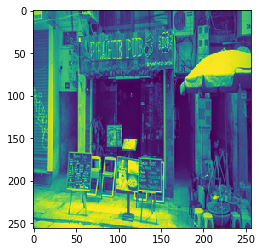

In [166]:
import keras
plt.figure()
plt.imshow(X_train[0])

img_len=256
img_width=256
# We reshape the input data to have a depth of 1 (grey scale)
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_len, img_width)
    X_test = X_test.reshape(X_test.shape[0], 1, img_len, img_width)
    input_shape = (1, img_len, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_len, img_width, 1)
    X_test = X_test.reshape(X_test.shape[0], img_len, img_width, 1)
    input_shape = (28, 28, 1)
print(X_train[1].shape)

In [167]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

 # Then we normalize it so that the values are between 0 and 1
X_train /= img_len*img_width
X_test /= img_len*img_width

print(X_train)
X_train.shape

[[[[0.00317383]
   [0.0032196 ]
   [0.00323486]
   ...
   [0.00260925]
   [0.00257874]
   [0.00254822]]

  [[0.00318909]
   [0.0032196 ]
   [0.00323486]
   ...
   [0.00260925]
   [0.00259399]
   [0.00254822]]

  [[0.00317383]
   [0.0032196 ]
   [0.0032196 ]
   ...
   [0.00262451]
   [0.00260925]
   [0.00257874]]

  ...

  [[0.00296021]
   [0.00314331]
   [0.00326538]
   ...
   [0.00062561]
   [0.00053406]
   [0.0015564 ]]

  [[0.00270081]
   [0.00265503]
   [0.00291443]
   ...
   [0.00059509]
   [0.00050354]
   [0.001297  ]]

  [[0.00248718]
   [0.00254822]
   [0.00265503]
   ...
   [0.00054932]
   [0.00048828]
   [0.00117493]]]


 [[[0.00350952]
   [0.00349426]
   [0.00369263]
   ...
   [0.00352478]
   [0.00352478]
   [0.00352478]]

  [[0.00357056]
   [0.00364685]
   [0.00279236]
   ...
   [0.00352478]
   [0.00352478]
   [0.00352478]]

  [[0.0032959 ]
   [0.00163269]
   [0.00126648]
   ...
   [0.00352478]
   [0.00352478]
   [0.00352478]]

  ...

  [[0.00344849]
   [0.00344849]
   [0.0

(2991, 256, 256, 1)

In [ ]:
# Defining the model
model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(img_len, img_width, 1)))
# 32 is the number of convolutional filters to use. Frist 3 is the number of rows in each convolution kernel and second 3 is the number of columns in each kernel.

print(model.output_shape)
# (None, 32, 26, 26)

model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

model.add(Dropout(0.25))
# Dropout regularizes the model and prevents overfitting

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Final layer has the output size of 10 to correspond to the number of classes

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit model to training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

# Evaluate the model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print("test loss:", score[0])
print("test accuracy:",  score[1])
# score[0] gives you the test loss and score[1] gives you the accuracy

tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1, write_graph=True, write_grads=True, batch_size=32, write_images=True)

# We can use a call back to look into the internal state of the model during training
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[tbCallBack])


C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


(None, 254, 254, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 126, 126, 32)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65028224  
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               

***BELOW THIS POINT IS CODE TRIED THAT DOESN'T WORK KEPT FOR REFERENCE***

In [105]:
import csv
dirname='C:\\WPI\\MachineLearning\\FinalProject_Local\\'
files=['X_train','X_test','Y_train','Y_test']
filename=dirname+'X_train.csv'
with open(filename,"w+") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        csvWriter.writerows(X_train)

with open(filename, 'r') as f:
    reader = csv.reader(f)
    data_as_list = list(reader)

data_as_list==X_train


C:\Users\clair\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  del sys.path[0]


False

In [182]:
def build_master_df():
    BBOX='C:\\WPI\\MachineLearning\\FinalProject_Local\\bbox_test.csv'
    
    #THESE FUNCTIONS ARE USED TO ESTABLISH CONNECTION WITH GCP AND EXTRACT ARRAY OF ALL IMAGES
    mini_batch=create_minibatch(client,BUCKET)
    
    #STRIP THE PATH INFO PROVIDED TO DETERMINE OPENIMAGES IMAGEID
    image_info=strip_filepath(mini_batch)
    image_info=pd.Dataframe(image_info)
    
    #READ IN BOUNDING BOX
    bbox=pd.read_csv(BBOX)
    
    
    #MERGE LIST OF ALL FILES WITH BOUNDING BOX INFORMATION
    df_all = pd.merge(files, bbox, on='ImageID', how='right')
    return(df_all)

In [192]:
BBOX='C:\\WPI\\MachineLearning\\FinalProject_Local\\bbox_test.csv'
    
#THESE FUNCTIONS ARE USED TO ESTABLISH CONNECTION WITH GCP AND EXTRACT ARRAY OF ALL IMAGES
mini_batch=create_minibatch(client,BUCKET)
    
#STRIP THE PATH INFO PROVIDED TO DETERMINE OPENIMAGES IMAGEID
image_info=strip_filepath(mini_batch)

#READ IN BOUNDING BOX
bbox=pd.read_csv(BBOX)


Table
Tree
Person
Boat


In [215]:
BBOX='C:\\WPI\\MachineLearning\\FinalProject_Local\\PointAnnotationsSet.txt'
vals=read_file_JSON(BBOX)
print(vals)

None


In [ ]:
bbox=pd.read_json(BBOX)
print(bbox['annotations'])
for rec in bbox['annotations']:
    print(rec)


In [212]:
def read_file_JSON(filename):
    with open(filename, 'r') as file:
        # self.response.write(cloudstorage_file.read())
        annotString = file.read()
        file.close()
    annotations = json.loads(annotString)
    return annotations

In [193]:
#STRIP THE PATH INFO PROVIDED TO DETERMINE OPENIMAGES IMAGEID
image_info=strip_filepath(mini_batch)
image_info[1:2]

,ImageID,Url
1,00108e3a60a46128,Table/00108e3a60a46128.jpg


In [197]:
image_info[1:2]
bbox[1:2]
df_all = pd.merge(image_info, bbox, on='ImageID', how='right')
print(df_all[1:2])
len(df_all[df_all.Url.notnull()])


    ImageID  Url Source  LabelName  Confidence      XMin      XMax  YMin  \
1  IMG_0290  NaN  human  /m/08dz3q           1  0.472542  0.985091   0.0   

       YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside  
1  0.903925           0            0          0            0         0  


0